In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
import copy

In [38]:
def define_Liao():
    global c1, c2, c3, c4, c5
    global ABC_order
    if ABC_order == 5:
        c1 = 5
        c2 = 10
        c3 = 10
        c4 = 5
        c5 = 1
    elif ABC_order == 4:
        c1 = 4
        c2 = 6
        c3 = 4
        c4 = 1
        c5 = 0
    elif ABC_order == 3:
        c1 = 3
        c2 = 3
        c3 = 1
        c4 = 0
        c5 = 0
    else:
       print('Error: Wrong Value')

In [39]:
def Liao_ABC():
    global c1,c2,c3,c4,c5
    global Ez
    global Ez1, Ez2, Ez3, Ez4,Ez5
    global nx, ny
    global ABC_order
    for j in range(ny):
        Ez[0, j] = (c1 * Ez1[1, j] )- (c2 * Ez2[2, j]) + (c3 * Ez3[3, j])-(c4 * Ez4[4, j]) + (c5 * Ez5[5, j])
    for j in range(ny):
        Ez[nx-1, j] = (c1 * Ez1[nx - 2, j] )- (c2 * Ez2[nx - 3, j] )+ (c3 * Ez3[nx - 4, j]) -(c4 * Ez4[nx - 5, j]) + (c5 * Ez5[nx - 6, j])
    for i in range(1, nx-1):
        Ez[i, 0] = (c1 * Ez1[i, 1]) - (c2 * Ez2[i, 2] )+ (c3 * Ez3[i, 3])-(c4 * Ez4[i, 4]) + (c5 * Ez5[i, 5])
    for i in range(1, nx-1):
        Ez[i, ny-1] = (c1 * Ez1[i, ny-2]) - (c2 * Ez2[i, ny-3]) + (c3 * Ez3[i, ny-4])-(c4 * Ez4[i, ny-5]) + (c5 * Ez5[i, ny-6])
    if ABC_order == 5:
        Ez5 = Ez4
        Ez4 = Ez3
        Ez3 = Ez2
        Ez2 = Ez1
        Ez1 = Ez
    elif ABC_order == 4:
        Ez4 = copy.deepcopy(Ez3)
        Ez3 = copy.deepcopy(Ez2)
        Ez2 = copy.deepcopy(Ez1)
        Ez1 = copy.deepcopy(Ez)
    elif ABC_order == 3:
        Ez3 = Ez2
        Ez2 = Ez1
        Ez1 = Ez
    else:
        print('Error: Wrong Value')

In [40]:
def define_media(iflaga):
    global nx, ny, mxst, mxnd, myst, mynd
    global mediaEz, mediaHx, mediaHy
    if (iflaga == 2):
        for i in range(nx):
            for j in range(ny):
                if (i >= mxst-1 and i <= mxnd-1):
                    if (j >= myst-1 and j <= mynd-1):
                        mediaEz[i, j] = 2
        for i in range(nx):
            for j in range(ny):
                if (i >= mxst-1 and i <= mxnd-1):
                    if (j >= myst-1 and j <= mynd - 2):
                        mediaHx[i, j] = 2
        for i in range(nx):
            for j in range(ny):
                if (i >= mxst and i <= mxnd - 1):
                    if (j >= myst-1 and j <= mynd-1):
                        mediaHy[i, j] = 2

In [41]:
def define_coefficients():

    global Ca, Cb, Da, Db  # Define material based coefficients
    global xmu, eps0, dt, ds
    # Field Coefficients
    dte = dt/(ds*eps0)
    dtm = dt/(ds*xmu)
    Da[0] = 1
    Db[0] = dtm
    Ca[0] = 1
    Cb[0] = dte
    Da[1] = 0
    Db[1] = 0
    Ca[1] = 0
    Cb[1] = 0


In [42]:
def Source(n, sources):
    # Creates a half-sinusoidal source between the time increments
    # 1 and 10.%
    # When source = 1 : Sinusoid
    #               2 : Gaussian
    #
    ## For Gaussian Source
    global Ezs
    if sources == 2:
        xndec = 10.0
        xn0 = 4*xndec
        Ezs = math.exp(-((n-xn0)/(xndec))**2)
    elif sources == 1:
        if ( n >=0 and n <= 9):
            Ezs = math.sin(n*np.pi/10)
    return Ezs


In [43]:
def adv_Ez(n, sources):
    global Ez, Hx, Hy
    global mediaEz
    global Ca, Cb
    global nx, ny
    for i in range(nx):
        for j in range(ny):
            m = int(mediaEz[i, j]-1)
            if (i == 5):
                Es = Source(n, sources)
            else:
                Es = 0
            if (i >= 1 and j >= 1):
                Ez[i, j] = Ez[i, j] * Ca[m] + Cb[m] * (Hy[i, j] - Hy[i - 1, j]- (Hx[i, j] - Hx[i, j - 1])) + Es
            elif(i >= 1 and j == 0):
                Ez[i, j] = Ez[i, j] * Ca[m] + Cb[m] * (Hy[i, j] - Hy[i - 1, j]- Hx[i, j]) + Es

In [44]:
def adv_H():
    global Ez, Hx, Hy
    global mediaHx, mediaHy
    global Da, Db
    global nx, ny
    for i in range(nx):
        for j in range(ny-1):
            m = int(mediaHx[i, j])-1
            Hx[i, j] = Hx[i, j]*Da[m] - Db[m]*(Ez[i, j+1] - Ez[i, j])
    for i in range(nx - 1):
        for j in range(ny):
            m = int(mediaHy[i, j])-1
            Hy[i, j] = Hy[i, j]*Da[m] + Db[m]*(Ez[i+1, j] - Ez[i, j])

In [45]:
def my_surface_plot(field):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xd = np.linspace(0, 10, 100)
    yd = np.linspace(0, 10, 80)
    [xdg, ydg] = np.meshgrid(xd, yd)
    dem3d = ax.plot_surface(xdg, ydg, field, cmap='rainbow', edgecolor='none')
    fig.colorbar(dem3d, shrink=0.5, aspect=5)

    
def my_line_plot(Ez_5, Ez_15, Ez_25, Ez_35, Ez_45, Ez_55, Ez_65, Ez_75, Ez_85, Ez_95, iflaga, source):
    maxval=1.4
    global strip
    fig = plt.figure(figsize=(6,6))
    plt.subplot(10, 1, 1)
    plt.plot(range(len(Ez_5)), Ez_5, 'k', label='n=5')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 2)
    plt.plot(range(len(Ez_15)), Ez_15, 'k', label='n=15')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 3)
    plt.plot(range(len(Ez_25)), Ez_25, 'k', label='n=25')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 4)
    plt.plot(range(len(Ez_35)), Ez_35, 'k', label='n=35')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 5)
    plt.plot(range(len(Ez_45)), Ez_45, 'k', label='n=45')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 6)
    plt.plot(range(len(Ez_55)), Ez_55, 'k', label='n=55')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 7)
    plt.plot(range(len(Ez_65)), Ez_65, 'k', label='n=65')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 8)
    plt.plot(range(len(Ez_75)), Ez_75, 'k', label='n=75')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 9)
    plt.plot(range(len(Ez_85)), Ez_85, 'k', label='n=85')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    plt.xticks([])
    plt.subplot(10, 1, 10)
    plt.plot(range(len(Ez_95)), Ez_95, 'k', label='n=95')
    plt.legend(loc=1)
    plt.xlim([0, 80])
    #plt.xticks([])
    if iflaga == 1 and source == 1:
        fig.suptitle('Line Plots for E-field with no obstacle for a sinusoid source, strip = %d' % strip)
    elif iflaga == 2 and source == 1:
        fig.suptitle('Line Plots for E-field with a PEC box for a sinusoid source, strip = %d' % strip)
    elif iflaga == 1  and source == 2:
        fig.suptitle('Line Plots for E-field with no obstacle box for a Gaussian source, strip = %d' % strip)
    elif iflaga == 2  and source == 2:
        fig.suptitle('Line Plots for E-field with a PEC box for a Gaussian source, strip = %d' % strip)
    plt.show()

In [46]:
## Routine to zero out the global variables
#*************************
# *************************
def zeroing():
    global nx, ny
    global Ez, Hx, Hy
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db
    global Ez1, Ez2, Ez3, Ez4, Ez5
# Clears but retains the variables in memory
    Ez = np.zeros((nx, ny)) # z-component of E-field
    Hx = np.zeros((nx, ny)) # x-component of H-field
    Hy = np.zeros((nx, ny)) # y-component of H-field

    Ez1 = np.zeros((nx, ny))
    Ez2 = np.zeros((nx, ny))
    Ez3 = np.zeros((nx, ny))
    Ez4 = np.zeros((nx, ny))
    Ez5 = np.zeros((nx, ny))

    mediaEz = np.ones((nx, ny)) # z-component of E-field
    mediaHx = np.ones((nx, ny)) #x-component of H-field
    mediaHy = np.ones((nx, ny)) # x-component of H-field

    Ca = np.zeros((2, 1)) # x-component of H-field
    Cb = np.zeros((2, 1)) # x-component of H-field
    Da = np.zeros((2, 1)) # x-component of H-field
    Db = np.zeros((2, 1)) # x-component of H-field

In [47]:
def init_ex4():
    global c, xmu, eps0, asize
    global nx, ny, nt, mxst, mxnd, myst, mynd
    global dt, ds
    global Ez, Hx, Hy
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db
    global c1, c2, c3, c4, c5
    global Ez1, Ez2, Ez3, Ez4, Ez5
    global ABC_order

    c = 2.99792458e8
    xmu = 4*math.pi*1e-7
    eps0 = 8.854187817e-12
    asize = 5 # Space Dimension in meters
    nx = 80     # Number of cells in x-direction
    ny = 100     # Number of cells in y-direction
    nt = 400    # Number of time steps
    mxst = 17    # Start of PEC section in x-direction
    mxnd = 49    # End of PEC section in x-direction
    myst = 33   # Start of PEC section in y-direction
    mynd = 65    # End of PEC section in y-direction
    strip = 30
    # % Initialize

    Ez = np.zeros((nx, ny))
    Hx = np.zeros((nx, ny))
    Hy = np.zeros((nx, ny))

    mediaEz = np.ones((nx, ny))
    mediaHx = np.ones((nx, ny))
    mediaHy = np.ones((nx, ny))

    Ca = np.zeros((2, 1))
    Cb = np.zeros((2, 1))
    Da = np.zeros((2, 1))
    Db = np.zeros((2, 1))

    Ez1 = np.zeros((nx, ny))
    Ez2 = np.zeros((nx, ny))
    Ez3 = np.zeros((nx, ny))
    Ez4 = np.zeros((nx, ny))
    Ez5 = np.zeros((nx, ny))

    Ez_5 = np.zeros((1, nx))
    Ez_35 = np.zeros((1, nx))
    Ez_65 = np.zeros((1, nx))
    Ez_95 = np.zeros((1, nx))

    ds = asize/(mxnd - mxst - 1)
    dt = ds/(c*math.sqrt(2))

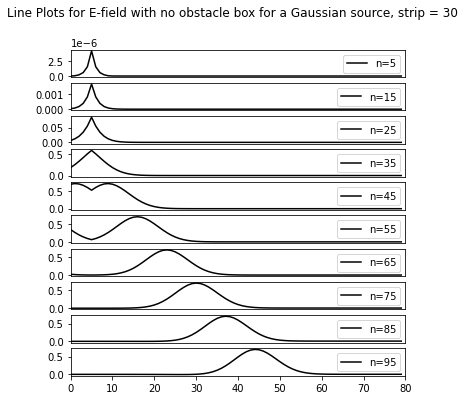

In [48]:
global strip
init_ex4()
iflaga = 1
define_media(iflaga)
define_coefficients()
source = 2
ABC_order = 4
define_Liao()
strip = 30
for n in range(nt):
    adv_Ez(n, source)
    Liao_ABC()
    adv_H()
    # if n % 5 == 0:
    #     my_surface_plot(Ez)
    #     plt.title('3D plot of $E_z$ with PEC box')
    #     plt.show()
    #     plt.show()
    if n == 5:
        Ez_5 = copy.deepcopy(Ez[:, strip])
    elif n == 15:
        Ez_15 = copy.deepcopy(Ez[:, strip])
    elif n == 25:
        Ez_25 = copy.deepcopy(Ez[:, strip])
    elif n == 35:
        Ez_35 = copy.deepcopy(Ez[:, strip])
    elif n == 45:
        Ez_45 = copy.deepcopy(Ez[:, strip])
    elif n == 55:
        Ez_55 = copy.deepcopy(Ez[:, strip])
    elif n == 65:
        Ez_65 = copy.deepcopy(Ez[:, strip])
    elif n == 75:
        Ez_75 = copy.deepcopy(Ez[:, strip])
    elif n == 85:
        Ez_85 = copy.deepcopy(Ez[:, strip])
    elif n == 95:
        Ez_95 = copy.deepcopy(Ez[:, strip])

my_line_plot(Ez_5, Ez_15, Ez_25, Ez_35, Ez_45, Ez_55, Ez_65, Ez_75, Ez_85, Ez_95, iflaga, source)
zeroing()